In [1]:
%pylab --no-import-all notebook
import warnings
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import pandas as pd
import Classification as CL
import os
import time
from copy import copy
way = os.getcwd() + "/Data_npy/"
way1 = way + "Chosen ones/"
valid_path = os.getcwd() + "/Validační tabulky/"

Populating the interactive namespace from numpy and matplotlib


In [2]:
trlist = np.load(way + "seznam.npy").tolist()

<IPython.core.display.Javascript object>


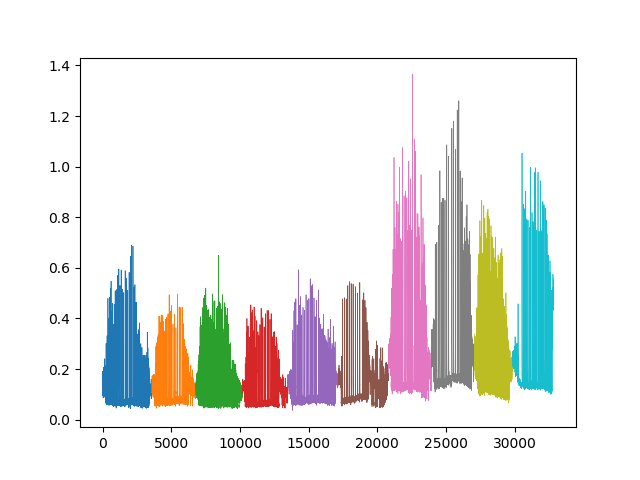

In [3]:
tmp = [np.load(way1 + d)[1] for d in trlist[:-1]]
tmp.append(np.load(way1 + "No11.npy")[1])
plt.figure("Vybraná reálná data")
posun = 0
for i in tmp:
    plt.plot(np.arange(len(i))+ posun, i, '-', lw=0.5)
    posun = posun +len(i) 
plt.show()

<IPython.core.display.Javascript object>


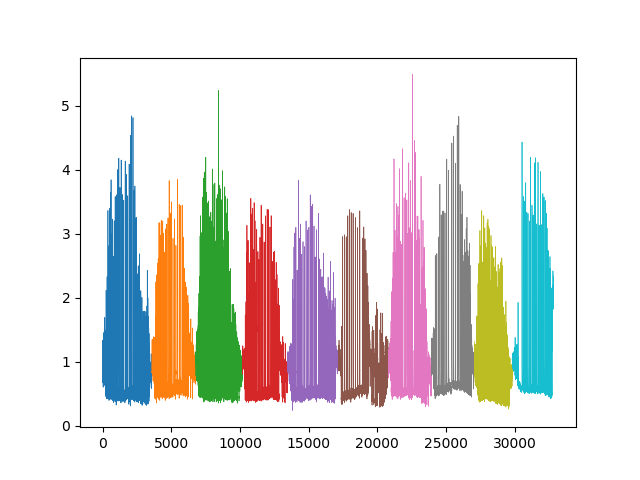

In [4]:
norma = [CL.normalization(np.load(way1 + d)[1] , delka_useku = 20, training_set = True) for d in trlist[:-1]]
norma.append(CL.normalization(np.load(way1 + "No11.npy")[1] , delka_useku = 20, training_set = True))
plt.figure("Vybraná reálná data po normalizaci")
posun = 0
for i in norma:
    plt.plot(np.arange(len(i))+ posun, i, '-', lw=0.5)
    posun = posun +len(i)
plt.show()

In [5]:
train_data = []
test_data = []
for data in trlist[:-1]:
    train_data.append(np.load(way1 + data))

train_data.append(np.load(way1 + "No11.npy"))    
test_data.append(copy(train_data[-1]))

In [6]:
valid_tab = []
for i in range(1,11):
    valid_tab.append(pd.read_csv(valid_path + "Real_data_HMM_" + str(i) + "_Hm.csv"))

In [7]:
Sorted_tab = []
for val in valid_tab:
    Sorted_tab.append(val.sort_values(['Accuracy'], ascending=False))

In [8]:
Sorted_tab[0].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3026,"(1, 0, 1, 1, 1)","(6, 10, 12, 14)",0.913667,259,0.954910,0.874042,0.836957,0.888636,0.953065,0.815951,0.880000,0.956763,0.941038,0.797927
3051,"(1, 0, 1, 1, 1)","(6, 10, 16, 15)",0.910333,269,0.950690,0.875136,0.837908,0.887912,0.966762,0.810865,0.845646,0.935144,0.950472,0.830311
2931,"(1, 0, 1, 1, 1)","(4, 10, 14, 15)",0.910000,270,0.953769,0.859574,0.837022,0.883455,0.964306,0.782946,0.867872,0.943459,0.952830,0.808290
2990,"(1, 0, 1, 1, 1)","(6, 8, 12, 14)",0.909333,272,0.950738,0.874317,0.831099,0.885385,0.954723,0.814664,0.861111,0.946785,0.943396,0.803109
2918,"(1, 0, 1, 1, 1)","(4, 10, 12, 14)",0.909000,273,0.950710,0.874042,0.830214,0.884989,0.955232,0.815951,0.857735,0.946231,0.941038,0.804404
2944,"(1, 0, 1, 1, 1)","(4, 10, 16, 16)",0.908667,274,0.947518,0.881650,0.836551,0.888573,0.970366,0.816901,0.831202,0.925721,0.957547,0.841969
2932,"(1, 0, 1, 1, 1)","(4, 10, 14, 16)",0.908333,275,0.947964,0.878261,0.835492,0.887239,0.967667,0.814516,0.835492,0.929047,0.952830,0.835492
3147,"(1, 0, 1, 1, 1)","(0, 10, 14, 15)",0.908000,276,0.947458,0.877307,0.836970,0.887245,0.971462,0.812877,0.829517,0.924612,0.952830,0.844560
4118,"(1, 1, 1, 1, 1)","(6, 10, 16, 16)",0.908000,276,0.947130,0.881650,0.833982,0.887588,0.966532,0.816901,0.835065,0.928492,0.957547,0.832902
3052,"(1, 0, 1, 1, 1)","(6, 10, 16, 16)",0.907667,277,0.947518,0.877996,0.834939,0.886817,0.970366,0.815789,0.828025,0.925721,0.950472,0.841969


In [9]:
Sorted_tab[1].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3998,"(1, 1, 1, 1, 1)","(4, 10, 14, 16)",0.815904,507,0.809884,0.820623,0.818813,0.816440,0.795837,0.974490,0.784922,0.824435,0.708720,0.855761
752,"(0, 0, 1, 1, 1)","(4, 8, 12, 16)",0.814815,510,0.820680,0.815054,0.809543,0.815092,0.751066,0.969309,0.826891,0.904517,0.703154,0.792909
3950,"(1, 1, 1, 1, 1)","(4, 8, 12, 16)",0.812999,515,0.804793,0.827068,0.814297,0.815386,0.783285,0.982143,0.786197,0.827515,0.714286,0.844480
4118,"(1, 1, 1, 1, 1)","(6, 10, 16, 16)",0.812999,515,0.813835,0.804798,0.815238,0.811291,0.806452,0.976190,0.773121,0.821355,0.684601,0.862208
2944,"(1, 0, 1, 1, 1)","(4, 10, 16, 16)",0.811547,519,0.815079,0.787813,0.817212,0.806701,0.808898,0.952632,0.774729,0.821355,0.671614,0.864625
3100,"(1, 0, 1, 1, 1)","(0, 8, 12, 16)",0.810821,521,0.828452,0.777202,0.810338,0.805331,0.844350,0.880282,0.766906,0.813142,0.695733,0.858985
968,"(0, 0, 1, 1, 1)","(0, 8, 12, 16)",0.810821,521,0.836311,0.778261,0.801748,0.805440,0.789426,0.939633,0.790752,0.889117,0.664193,0.813054
2884,"(1, 0, 1, 1, 1)","(4, 8, 12, 16)",0.810094,523,0.813098,0.795154,0.813002,0.807085,0.798220,0.978320,0.773654,0.828542,0.669759,0.856567
3076,"(1, 0, 1, 1, 1)","(6, 0, 14, 16)",0.808279,528,0.837109,0.757709,0.809845,0.801554,0.881818,0.721477,0.798122,0.796715,0.797774,0.821918
2932,"(1, 0, 1, 1, 1)","(4, 10, 14, 16)",0.807553,530,0.817489,0.776053,0.810913,0.801485,0.809668,0.964187,0.765379,0.825462,0.649351,0.862208


In [10]:
Sorted_tab[2].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3160,"(1, 0, 1, 1, 1)","(0, 10, 16, 16)",0.922732,241,0.945881,0.920522,0.871046,0.912483,0.956334,0.881818,0.868932,0.935654,0.962779,0.873171
3148,"(1, 0, 1, 1, 1)","(0, 10, 14, 16)",0.920487,248,0.945125,0.914016,0.867278,0.908807,0.954790,0.869955,0.869939,0.935654,0.962779,0.864634
3100,"(1, 0, 1, 1, 1)","(0, 8, 12, 16)",0.920487,248,0.942456,0.927885,0.866055,0.912132,0.947733,0.899767,0.868712,0.937236,0.957816,0.863415
4010,"(1, 1, 1, 1, 1)","(4, 10, 16, 16)",0.919525,251,0.939873,0.937799,0.862112,0.913261,0.939873,0.905312,0.878481,0.939873,0.972705,0.846341
4118,"(1, 1, 1, 1, 1)","(6, 10, 16, 16)",0.918884,253,0.939626,0.936068,0.861386,0.912360,0.939378,0.910798,0.874372,0.939873,0.962779,0.848780
3998,"(1, 1, 1, 1, 1)","(4, 10, 14, 16)",0.917602,257,0.938453,0.938331,0.857676,0.911487,0.935992,0.915094,0.874525,0.940928,0.962779,0.841463
4082,"(1, 1, 1, 1, 1)","(6, 8, 16, 16)",0.917602,257,0.938883,0.935758,0.858380,0.911007,0.937895,0.914692,0.870765,0.939873,0.957816,0.846341
4106,"(1, 1, 1, 1, 1)","(6, 10, 14, 16)",0.916640,260,0.938700,0.933171,0.856258,0.909376,0.936483,0.914286,0.870277,0.940928,0.952854,0.842683
3950,"(1, 1, 1, 1, 1)","(4, 8, 12, 16)",0.914075,268,0.936304,0.935758,0.849812,0.907291,0.930693,0.914692,0.872751,0.941983,0.957816,0.828049
968,"(0, 0, 1, 1, 1)","(0, 8, 12, 16)",0.912793,272,0.940538,0.915777,0.840864,0.899060,0.922414,0.877273,0.908062,0.959388,0.957816,0.782927


In [11]:
Sorted_tab[3].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3100,"(1, 0, 1, 1, 1)","(0, 8, 12, 16)",0.840127,502,0.883037,0.804270,0.801971,0.829760,0.887895,0.959660,0.736626,0.878231,0.692190,0.880039
2908,"(1, 0, 1, 1, 1)","(4, 8, 16, 16)",0.838854,506,0.883531,0.796820,0.800726,0.827026,0.882034,0.941545,0.743676,0.885034,0.690658,0.867257
2944,"(1, 0, 1, 1, 1)","(4, 10, 16, 16)",0.838854,506,0.884655,0.790821,0.802536,0.826004,0.884956,0.933333,0.743913,0.884354,0.686064,0.871190
3136,"(1, 0, 1, 1, 1)","(0, 10, 12, 16)",0.838535,507,0.881565,0.800715,0.801601,0.827961,0.889813,0.961373,0.731925,0.873469,0.686064,0.885939
3016,"(1, 0, 1, 1, 1)","(6, 8, 16, 16)",0.838535,507,0.883753,0.792889,0.801627,0.826089,0.883152,0.944915,0.741639,0.884354,0.683002,0.872173
3040,"(1, 0, 1, 1, 1)","(6, 10, 14, 16)",0.838217,508,0.881218,0.801061,0.799453,0.827244,0.876768,0.947699,0.745115,0.885714,0.693721,0.862340
3052,"(1, 0, 1, 1, 1)","(6, 10, 16, 16)",0.838217,508,0.883673,0.792889,0.800903,0.825822,0.883673,0.944915,0.740401,0.883673,0.683002,0.872173
3159,"(1, 0, 1, 1, 1)","(0, 10, 16, 15)",0.837898,509,0.885773,0.788632,0.800000,0.824802,0.890646,0.938689,0.735367,0.880952,0.679939,0.877089
968,"(0, 0, 1, 1, 1)","(0, 8, 12, 16)",0.837580,510,0.876390,0.822086,0.789044,0.829173,0.843829,0.961066,0.771617,0.911565,0.718224,0.807276
2932,"(1, 0, 1, 1, 1)","(4, 10, 14, 16)",0.837580,510,0.881735,0.798942,0.798178,0.826285,0.878460,0.941788,0.743633,0.885034,0.693721,0.861357


In [12]:
Sorted_tab[4].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3040,"(1, 0, 1, 1, 1)","(6, 10, 14, 16)",0.877126,448,0.924343,0.860786,0.787584,0.857571,0.952928,0.878525,0.721293,0.897423,0.843750,0.867292
3051,"(1, 0, 1, 1, 1)","(6, 10, 16, 15)",0.876303,451,0.923281,0.856397,0.790062,0.856580,0.951834,0.858639,0.736111,0.896392,0.854167,0.852547
3004,"(1, 0, 1, 1, 1)","(6, 8, 14, 16)",0.876303,451,0.923200,0.860477,0.787105,0.856927,0.952825,0.876757,0.720490,0.895361,0.844792,0.867292
3016,"(1, 0, 1, 1, 1)","(6, 8, 16, 16)",0.876029,452,0.922340,0.861082,0.787363,0.856928,0.952747,0.876890,0.720000,0.893814,0.845833,0.868633
3052,"(1, 0, 1, 1, 1)","(6, 10, 16, 16)",0.876029,452,0.921971,0.860920,0.788578,0.857156,0.953719,0.874329,0.721111,0.892268,0.847917,0.869973
3003,"(1, 0, 1, 1, 1)","(6, 8, 14, 15)",0.875754,453,0.921289,0.864550,0.782178,0.856006,0.944745,0.878495,0.726437,0.898969,0.851042,0.847185
3015,"(1, 0, 1, 1, 1)","(6, 8, 16, 15)",0.875480,454,0.920829,0.861668,0.787026,0.856508,0.950110,0.873662,0.724099,0.893299,0.850000,0.861930
4082,"(1, 1, 1, 1, 1)","(6, 8, 16, 16)",0.875480,454,0.923648,0.859251,0.782502,0.855134,0.950873,0.869797,0.724059,0.897938,0.848958,0.851206
2884,"(1, 0, 1, 1, 1)","(4, 8, 12, 16)",0.874383,458,0.923847,0.859714,0.774876,0.852812,0.945013,0.874058,0.722738,0.903608,0.845833,0.835121
3039,"(1, 0, 1, 1, 1)","(6, 10, 14, 15)",0.874383,458,0.921690,0.857143,0.774236,0.851023,0.921215,0.864407,0.767105,0.922165,0.850000,0.781501


In [13]:
Sorted_tab[5].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3136,"(1, 0, 1, 1, 1)","(0, 10, 12, 16)",0.923098,282,0.940954,0.950893,0.877495,0.923114,0.947218,0.974828,0.858030,0.934772,0.928105,0.897864
2070,"(0, 1, 1, 1, 1)","(0, 10, 12, 16)",0.922007,286,0.938814,0.965286,0.872283,0.925461,0.945290,0.993088,0.851459,0.932426,0.938998,0.894150
3135,"(1, 0, 1, 1, 1)","(0, 10, 12, 15)",0.920916,290,0.939216,0.953125,0.871842,0.921394,0.939437,0.977117,0.862727,0.938996,0.930283,0.881151
3016,"(1, 0, 1, 1, 1)","(6, 8, 16, 16)",0.920644,291,0.940404,0.935205,0.875116,0.916908,0.940404,0.927195,0.878391,0.940404,0.943355,0.871866
2069,"(0, 1, 1, 1, 1)","(0, 10, 12, 15)",0.920644,291,0.937734,0.967598,0.867559,0.924297,0.935544,0.993119,0.862385,0.939934,0.943355,0.872795
3052,"(1, 0, 1, 1, 1)","(6, 10, 16, 16)",0.920371,292,0.940568,0.929990,0.875472,0.915343,0.941675,0.893574,0.889741,0.939465,0.969499,0.861653
4202,"(1, 1, 1, 1, 1)","(0, 10, 12, 16)",0.919553,295,0.939102,0.937365,0.873318,0.916595,0.941093,0.929336,0.872913,0.937119,0.945534,0.873723
3040,"(1, 0, 1, 1, 1)","(6, 10, 14, 16)",0.919280,296,0.939387,0.937229,0.871315,0.915977,0.936975,0.931183,0.878302,0.941811,0.943355,0.864438
3028,"(1, 0, 1, 1, 1)","(6, 10, 12, 16)",0.919280,296,0.938127,0.951002,0.868556,0.919228,0.933550,0.972665,0.868959,0.942750,0.930283,0.868152
3004,"(1, 0, 1, 1, 1)","(6, 8, 14, 16)",0.919007,297,0.939167,0.938245,0.870379,0.915930,0.936538,0.933190,0.877358,0.941811,0.943355,0.863510


In [14]:
Sorted_tab[6].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3040,"(1, 0, 1, 1, 1)","(6, 10, 14, 16)",0.858391,470,0.874884,0.843251,0.842570,0.853568,0.928807,0.802486,0.796846,0.826878,0.888379,0.893861
3004,"(1, 0, 1, 1, 1)","(6, 8, 14, 16)",0.857788,472,0.874341,0.840959,0.842983,0.852761,0.927584,0.800830,0.797586,0.826878,0.885321,0.893861
2884,"(1, 0, 1, 1, 1)","(4, 8, 12, 16)",0.856282,477,0.872301,0.835479,0.844845,0.850875,0.919376,0.784946,0.813886,0.829812,0.892966,0.878252
3052,"(1, 0, 1, 1, 1)","(6, 10, 16, 16)",0.855981,478,0.871938,0.826494,0.850791,0.849741,0.924392,0.780952,0.809972,0.825117,0.877676,0.895942
3016,"(1, 0, 1, 1, 1)","(6, 8, 16, 16)",0.855981,478,0.872795,0.841716,0.838929,0.851147,0.923379,0.815186,0.787934,0.827465,0.870031,0.896982
4058,"(1, 1, 1, 1, 1)","(6, 8, 12, 16)",0.855077,481,0.872157,0.835607,0.840784,0.849516,0.915484,0.787551,0.812621,0.832746,0.889908,0.870968
3039,"(1, 0, 1, 1, 1)","(6, 10, 14, 15)",0.855077,481,0.873118,0.842867,0.834166,0.850051,0.916183,0.800550,0.802113,0.833920,0.889908,0.868887
3051,"(1, 0, 1, 1, 1)","(6, 10, 16, 15)",0.855077,481,0.870719,0.826992,0.849301,0.849004,0.918022,0.779432,0.815916,0.828052,0.880734,0.885536
3028,"(1, 0, 1, 1, 1)","(6, 10, 12, 16)",0.855077,481,0.874961,0.845300,0.830078,0.850113,0.923127,0.819225,0.781969,0.831573,0.873089,0.884495
3003,"(1, 0, 1, 1, 1)","(6, 8, 14, 15)",0.855077,481,0.872314,0.842029,0.836000,0.850114,0.914414,0.800275,0.804620,0.833920,0.888379,0.869927


In [15]:
Sorted_tab[7].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3950,"(1, 1, 1, 1, 1)","(4, 8, 12, 16)",0.830528,574,0.868020,0.814872,0.800000,0.827631,0.922188,0.917976,0.718997,0.819863,0.732591,0.901572
3985,"(1, 1, 1, 1, 1)","(4, 10, 12, 15)",0.829348,578,0.866403,0.818466,0.796616,0.827162,0.913440,0.933929,0.717219,0.823973,0.728412,0.895782
2944,"(1, 0, 1, 1, 1)","(4, 10, 16, 16)",0.829052,579,0.866200,0.805317,0.803738,0.825085,0.937749,0.918004,0.710744,0.804795,0.717270,0.924731
4106,"(1, 1, 1, 1, 1)","(6, 10, 14, 16)",0.828462,581,0.869056,0.805031,0.799133,0.824407,0.932496,0.924188,0.709429,0.813699,0.713092,0.914806
4070,"(1, 1, 1, 1, 1)","(6, 8, 14, 16)",0.827576,584,0.868768,0.801879,0.798844,0.823164,0.934543,0.915921,0.708974,0.811644,0.713092,0.914806
4057,"(1, 1, 1, 1, 1)","(6, 8, 12, 15)",0.827576,584,0.867365,0.807368,0.796598,0.823777,0.918133,0.899145,0.720401,0.821918,0.732591,0.890819
3051,"(1, 0, 1, 1, 1)","(6, 10, 16, 15)",0.826986,586,0.870296,0.795238,0.798704,0.821413,0.932655,0.924354,0.707270,0.815753,0.697772,0.917287
2884,"(1, 0, 1, 1, 1)","(4, 8, 12, 16)",0.826986,586,0.867373,0.800000,0.799422,0.822265,0.929522,0.920290,0.709884,0.813014,0.707521,0.914806
920,"(0, 0, 1, 1, 1)","(6, 10, 16, 16)",0.826690,587,0.867244,0.821151,0.784479,0.824292,0.877895,0.929577,0.732425,0.856849,0.735376,0.844500
4118,"(1, 1, 1, 1, 1)","(6, 10, 16, 16)",0.826690,587,0.866789,0.805359,0.797122,0.823090,0.933597,0.927405,0.705283,0.808904,0.711699,0.916460


In [16]:
Sorted_tab[8].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
4106,"(1, 1, 1, 1, 1)","(6, 10, 14, 16)",0.901192,315,0.917134,0.922481,0.859275,0.899630,0.945408,0.896084,0.833506,0.890502,0.950479,0.886689
1818,"(0, 1, 1, 1, 1)","(4, 8, 12, 16)",0.900565,317,0.918318,0.925138,0.849747,0.897734,0.911747,0.912908,0.869816,0.924985,0.937700,0.830583
752,"(0, 0, 1, 1, 1)","(4, 8, 12, 16)",0.900565,317,0.918692,0.925138,0.848929,0.897586,0.911310,0.912908,0.870520,0.926195,0.937700,0.828383
860,"(0, 0, 1, 1, 1)","(6, 8, 12, 16)",0.900251,318,0.919796,0.927885,0.844914,0.897531,0.913484,0.930868,0.853933,0.926195,0.924920,0.836084
2932,"(1, 0, 1, 1, 1)","(4, 10, 14, 16)",0.899937,319,0.914734,0.928344,0.856995,0.900024,0.949252,0.925397,0.809990,0.882638,0.931310,0.909791
4058,"(1, 1, 1, 1, 1)","(6, 8, 12, 16)",0.899937,319,0.915506,0.931007,0.852442,0.899652,0.937262,0.924409,0.823590,0.894737,0.937700,0.883388
3986,"(1, 1, 1, 1, 1)","(4, 10, 12, 16)",0.899937,319,0.915118,0.931746,0.852754,0.899873,0.937778,0.925868,0.822268,0.893527,0.937700,0.885589
3028,"(1, 0, 1, 1, 1)","(6, 10, 12, 16)",0.899624,320,0.917420,0.925926,0.852987,0.898778,0.946015,0.933442,0.808071,0.890502,0.918530,0.903190
788,"(0, 0, 1, 1, 1)","(4, 10, 12, 16)",0.899624,320,0.919098,0.926282,0.845258,0.896879,0.913876,0.929260,0.852349,0.924380,0.923323,0.838284
2992,"(1, 0, 1, 1, 1)","(6, 8, 12, 16)",0.899624,320,0.917808,0.925181,0.852681,0.898557,0.945478,0.931929,0.809289,0.891712,0.918530,0.900990


In [17]:
Sorted_tab[9].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2422,"(1, 0, 0, 1, 1)","(0, 8, 16, 16)",0.840656,573,0.867079,0.769524,0.835213,0.823939,0.979361,0.652666,0.778305,0.777895,0.937355,0.901099
3171,"(1, 0, 1, 1, 1)","(0, 0, 12, 15)",0.840100,575,0.870225,0.767486,0.830314,0.822675,0.970091,0.647528,0.784766,0.789001,0.941995,0.881476
3170,"(1, 0, 1, 1, 1)","(0, 0, 12, 14)",0.839822,576,0.874784,0.757263,0.827379,0.819809,0.962540,0.635220,0.794224,0.801692,0.937355,0.863422
2386,"(1, 0, 0, 1, 1)","(6, 0, 16, 16)",0.839822,576,0.865487,0.765316,0.836921,0.822574,0.978652,0.644444,0.781868,0.775780,0.941995,0.900314
3172,"(1, 0, 1, 1, 1)","(0, 0, 12, 16)",0.839544,577,0.866156,0.766444,0.834606,0.822402,0.978681,0.650485,0.777251,0.776838,0.932715,0.901099
3184,"(1, 0, 1, 1, 1)","(0, 0, 14, 16)",0.839544,577,0.866077,0.766160,0.834909,0.822382,0.979320,0.648953,0.777778,0.776309,0.935035,0.901099
2494,"(1, 0, 0, 1, 1)","(0, 0, 16, 16)",0.839266,578,0.864577,0.769527,0.834475,0.822860,0.980550,0.658416,0.771848,0.773136,0.925754,0.908163
3183,"(1, 0, 1, 1, 1)","(0, 0, 14, 15)",0.838988,579,0.870911,0.759661,0.829701,0.820091,0.972603,0.639683,0.783671,0.788472,0.935035,0.881476
2458,"(1, 0, 0, 1, 1)","(0, 10, 16, 16)",0.838710,580,0.866824,0.762089,0.832851,0.820588,0.978709,0.653400,0.772483,0.777895,0.914153,0.903454
2421,"(1, 0, 0, 1, 1)","(0, 8, 16, 15)",0.838710,580,0.869743,0.760377,0.830133,0.820084,0.971298,0.640700,0.783821,0.787414,0.935035,0.882261


# Cross fold

In [18]:
temp = list(valid_tab[0]["Kombinace rysů"])
temp1 = list(valid_tab[0]["délky úseku"])

In [19]:
tab_prumer = copy(valid_tab[0])
for i in valid_tab[1:]:
    tab_prumer = tab_prumer+i
    
tab_prumer = tab_prumer.drop("Kombinace rysů", axis =1)
tab_prumer = tab_prumer.drop("délky úseku", axis =1)
tab_prumer = tab_prumer/10
tab_prumer.insert(loc = 0, column = "délka úseku", value = temp1)
tab_prumer.insert(loc = 0, column = "Kombinace rysů", value = temp)
tab_prumer.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 0, 0, 1)","(0, 0, 0, 5)",0.763358,769.8,0.866595,0.725077,0.504211,0.698628,0.788285,0.631931,0.849195,0.967032,0.854523,0.360576
1,"(0, 0, 0, 0, 1)","(0, 0, 0, 6)",0.774940,732.5,0.873890,0.725210,0.547571,0.715557,0.803309,0.631631,0.859115,0.962100,0.855412,0.404167
2,"(0, 0, 0, 0, 1)","(0, 0, 0, 7)",0.787674,691.0,0.880253,0.732328,0.592965,0.735182,0.818287,0.635798,0.875190,0.955680,0.867424,0.450936
3,"(0, 0, 0, 0, 1)","(0, 0, 0, 8)",0.797484,659.2,0.884519,0.735126,0.629999,0.749881,0.831723,0.636081,0.884525,0.947267,0.873886,0.491722
4,"(0, 0, 0, 0, 1)","(0, 0, 0, 9)",0.807886,626.1,0.888884,0.739673,0.665176,0.764578,0.844791,0.641570,0.887189,0.940166,0.876069,0.534799
5,"(0, 0, 0, 0, 1)","(0, 0, 0, 10)",0.813738,607.5,0.892712,0.735053,0.690044,0.772603,0.857749,0.635885,0.887176,0.932738,0.874050,0.567662
6,"(0, 0, 0, 0, 1)","(0, 0, 0, 11)",0.818824,591.8,0.896224,0.730771,0.712743,0.779912,0.871679,0.633351,0.879084,0.923863,0.866850,0.602827
7,"(0, 0, 0, 0, 1)","(0, 0, 0, 12)",0.824798,572.7,0.897757,0.731905,0.736480,0.788714,0.883565,0.635035,0.875631,0.913897,0.866824,0.638965
8,"(0, 0, 0, 0, 1)","(0, 0, 0, 13)",0.828290,560.7,0.898157,0.730474,0.754899,0.794510,0.894197,0.633158,0.874029,0.903571,0.866319,0.668453
9,"(0, 0, 0, 0, 1)","(0, 0, 0, 14)",0.831054,552.0,0.897472,0.729193,0.770639,0.799101,0.904024,0.635120,0.865098,0.892345,0.860278,0.699726


In [20]:
#tab_prumer.to_csv(valid_path + 'Cross_Fold_Modif_HMM_Hm.csv',index=False)

In [21]:
tab = pd.read_csv(valid_path + 'Cross_Fold_Modif_HMM_Hm.csv')

In [22]:
Sorted_Cross_Fold = tab.sort_values(['Accuracy'], ascending=False)
Sorted_Cross_Fold.head(20)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
4118,"(1, 1, 1, 1, 1)","(6, 10, 16, 16)",0.867752,432.2,0.896963,0.850990,0.825810,0.857921,0.922208,0.894550,0.788421,0.874542,0.828148,0.871895
2932,"(1, 0, 1, 1, 1)","(4, 10, 14, 16)",0.867013,434.3,0.897583,0.847708,0.823362,0.856218,0.921568,0.892989,0.791407,0.876770,0.824878,0.865948
4106,"(1, 1, 1, 1, 1)","(6, 10, 14, 16)",0.866975,434.3,0.896913,0.850931,0.823025,0.856957,0.919074,0.902288,0.787307,0.877263,0.823783,0.867216
3052,"(1, 0, 1, 1, 1)","(6, 10, 16, 16)",0.866620,435.2,0.898188,0.843926,0.824242,0.855452,0.923758,0.906164,0.785350,0.875809,0.810760,0.875586
3998,"(1, 1, 1, 1, 1)","(4, 10, 14, 16)",0.866444,436.8,0.895986,0.849086,0.823266,0.856113,0.918576,0.883554,0.792640,0.876063,0.833448,0.861187
3950,"(1, 1, 1, 1, 1)","(4, 8, 12, 16)",0.866245,437.3,0.894951,0.854716,0.819723,0.856463,0.910483,0.893479,0.796413,0.881471,0.835475,0.849298
2944,"(1, 0, 1, 1, 1)","(4, 10, 16, 16)",0.866143,437.5,0.897525,0.838097,0.824422,0.853348,0.924126,0.869635,0.792888,0.874324,0.825223,0.866726
2884,"(1, 0, 1, 1, 1)","(4, 8, 12, 16)",0.865660,438.5,0.897121,0.846819,0.818060,0.854000,0.914761,0.904393,0.787286,0.882038,0.812413,0.857815
3040,"(1, 0, 1, 1, 1)","(6, 10, 14, 16)",0.865005,440.4,0.898094,0.839928,0.819250,0.852424,0.921031,0.910209,0.777583,0.878202,0.796151,0.871842
3051,"(1, 0, 1, 1, 1)","(6, 10, 16, 15)",0.864731,441.3,0.897351,0.835659,0.821646,0.851552,0.917745,0.879479,0.793378,0.879764,0.814430,0.860226


In [23]:
Sorted_Cross_Fold = tab.sort_values(['F míra průměrná'], ascending=False)
Sorted_Cross_Fold.head(20)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
4118,"(1, 1, 1, 1, 1)","(6, 10, 16, 16)",0.867752,432.2,0.896963,0.850990,0.825810,0.857921,0.922208,0.894550,0.788421,0.874542,0.828148,0.871895
4106,"(1, 1, 1, 1, 1)","(6, 10, 14, 16)",0.866975,434.3,0.896913,0.850931,0.823025,0.856957,0.919074,0.902288,0.787307,0.877263,0.823783,0.867216
3950,"(1, 1, 1, 1, 1)","(4, 8, 12, 16)",0.866245,437.3,0.894951,0.854716,0.819723,0.856463,0.910483,0.893479,0.796413,0.881471,0.835475,0.849298
2932,"(1, 0, 1, 1, 1)","(4, 10, 14, 16)",0.867013,434.3,0.897583,0.847708,0.823362,0.856218,0.921568,0.892989,0.791407,0.876770,0.824878,0.865948
3998,"(1, 1, 1, 1, 1)","(4, 10, 14, 16)",0.866444,436.8,0.895986,0.849086,0.823266,0.856113,0.918576,0.883554,0.792640,0.876063,0.833448,0.861187
3052,"(1, 0, 1, 1, 1)","(6, 10, 16, 16)",0.866620,435.2,0.898188,0.843926,0.824242,0.855452,0.923758,0.906164,0.785350,0.875809,0.810760,0.875586
2884,"(1, 0, 1, 1, 1)","(4, 8, 12, 16)",0.865660,438.5,0.897121,0.846819,0.818060,0.854000,0.914761,0.904393,0.787286,0.882038,0.812413,0.857815
2944,"(1, 0, 1, 1, 1)","(4, 10, 16, 16)",0.866143,437.5,0.897525,0.838097,0.824422,0.853348,0.924126,0.869635,0.792888,0.874324,0.825223,0.866726
3040,"(1, 0, 1, 1, 1)","(6, 10, 14, 16)",0.865005,440.4,0.898094,0.839928,0.819250,0.852424,0.921031,0.910209,0.777583,0.878202,0.796151,0.871842
4082,"(1, 1, 1, 1, 1)","(6, 8, 16, 16)",0.863961,443.8,0.896717,0.838212,0.821881,0.852270,0.921446,0.890133,0.784835,0.874837,0.813226,0.868092
